In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
fdata=pd.read_excel('tips.xls')
fdata

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
#分析数据
fdata.describe().head()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000


In [4]:
#修改列名为汉字total_bill	tip	sex	smoker	day	time	size
fdata.rename(columns=({'total_bill':'消费总额','tip':'小费','sex':'性别','smoker':'是否抽烟',
                       'day':'星期','time':'聚餐时间段','size':'人数'}),inplace=True)

fdata.head()

,消费总额,小费,性别,是否抽烟,星期,聚餐时间段,人数
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


增加一列“人均消费”

In [13]:
fdata['人均消费']=round(fdata['消费总额']/fdata['人数'],2)
fdata.head()

,消费总额,小费,性别,是否抽烟,星期,聚餐时间段,人数,人均消费
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


查询抽烟男性中人均消费大于5的数据

In [48]:
# 方法1：
fdata[(fdata['是否抽烟']=='Yes') &(fdata['性别']=='Male') & (fdata['人均消费']> 15) ]
# 方法2:
# fdata[(fdata.是否抽烟=='Yes') &(fdata.性别=='Male') & (fdata.人均消费> 15) ]
# 方法3：

# fdata.query( '是否抽烟=="Yes" & 性别=="Male" & 人均消费>15')


,消费总额,小费,性别,是否抽烟,星期,聚餐时间段,人数,人均消费
83,32.68,5.00,Male,Yes,Thur,Lunch,2,16.34
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94
173,31.85,3.18,Male,Yes,Sun,Dinner,2,15.92
175,32.90,3.11,Male,Yes,Sun,Dinner,2,16.45
179,34.63,3.55,Male,Yes,Sun,Dinner,2,17.32
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27
237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.42


In [47]:
fdata.query( '是否抽烟=="Yes" & 性别=="Male" & 人均消费>15')


,消费总额,小费,性别,是否抽烟,星期,聚餐时间段,人数,人均消费
83,32.68,5.00,Male,Yes,Thur,Lunch,2,16.34
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94
173,31.85,3.18,Male,Yes,Sun,Dinner,2,15.92
175,32.90,3.11,Male,Yes,Sun,Dinner,2,16.45
179,34.63,3.55,Male,Yes,Sun,Dinner,2,17.32
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27
237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.42


d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28040 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36153 missing from cur

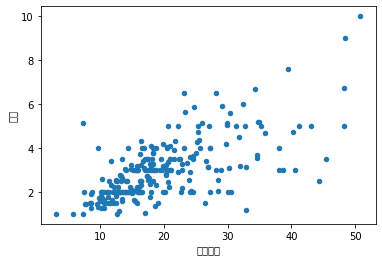

In [5]:
#分析小费和总金额的关系,散点图
fdata.plot(kind='scatter',x='消费总额',y='小费')
#正相关关系

In [6]:
#分析男女顾客哪个更慷慨，就是分组看看男性还是女性的小费平均水平更高
fdata.groupby('性别')['小费'].mean()


性别
Female    2.833448
Male      3.089618
Name: 小费, dtype: float64

['Sun' 'Sat' 'Thur' 'Fri']


d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


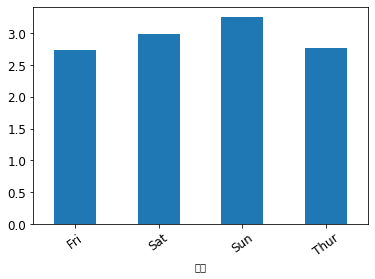

In [7]:
#分析日期和小费的关系，直方图
print(fdata['星期'].unique())
r=fdata.groupby('星期')['小费'].mean()
fig=r.plot(kind='bar',x='星期',y='小费',fontsize=12,rot=36)
# fig.axes.title.set_size(16)

d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28895 missing from c

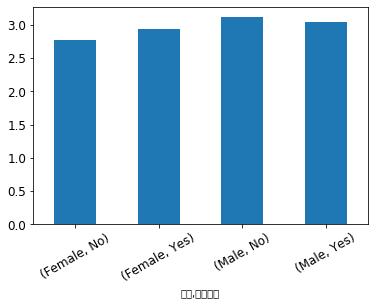

In [8]:
#性别+抽烟书对慷慨度的影响
r=fdata.groupby(['性别','是否抽烟'])['小费'].mean()
fig=r.plot(kind='bar',x=['性别','是否抽烟'],y='小费',fontsize=12,rot=30)
fig.axes.title.set_size(16)

d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32858 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27573 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\wx165\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32858 missing from c

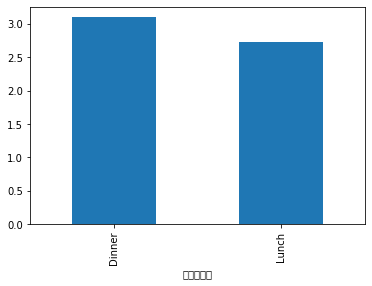

In [9]:
#聚餐时间与小费数额的关系
r=fdata.groupby('聚餐时间段')['小费'].mean()
fig=r.plot(kind='bar',x='聚餐时间',y='小费')
fig.axes.title.set_size(16)